In [59]:
#question 4
import torchvision
from torchvision import datasets, models, transforms
transforms = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],
[0.229, 0.224, 0.225])
])
train_set = datasets.ImageFolder("data/train",transforms)
val_set = datasets.ImageFolder("data/val",transforms)
model = models.resnet34(pretrained=True)


In [60]:
#Load data
trainDataLoader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=True)

In [61]:
# Modify the last layer to reduce to two classes
import torch.nn as nn
fc_features = model.fc.in_features
model.fc = nn.Linear(fc_features, 2)


In [62]:
# Train for 20 epochs
Loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
                            
train_loss_history = []
test_loss_history = []
num_epochs = 20


for epoch in range(num_epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(trainDataLoader):
        images, labels = data
        optimizer.zero_grad()
        predicted_output = model(images)
        fit = Loss(predicted_output,labels)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()
    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            images, labels = data
            predicted_output = model(images)
            fit = Loss(predicted_output,labels)
            test_loss += fit.item()
    train_loss = train_loss/len(trainDataLoader)
    test_loss = test_loss/len(testDataLoader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 5.912672147154808, Test loss 6.4493908286094666
Epoch 1, Train loss 5.580612480640411, Test loss 9.360929489135742
Epoch 2, Train loss 5.23075795173645, Test loss 4.383044719696045
Epoch 3, Train loss 2.2304809391498566, Test loss 0.6866860091686249
Epoch 4, Train loss 1.7485130205750465, Test loss 2.591944098472595
Epoch 5, Train loss 1.9165803715586662, Test loss 2.69940984249115
Epoch 6, Train loss 2.6500324010849, Test loss 6.068446636199951
Epoch 7, Train loss 2.687300056219101, Test loss 2.518357992172241
Epoch 8, Train loss 1.6594883054494858, Test loss 6.260555028915405
Epoch 9, Train loss 2.4952383637428284, Test loss 1.4688552021980286
Epoch 10, Train loss 0.8750230222940445, Test loss 0.9350690245628357
Epoch 11, Train loss 0.656981885433197, Test loss 1.371483564376831
Epoch 12, Train loss 1.746017411351204, Test loss 1.2741168141365051
Epoch 13, Train loss 0.7497603744268417, Test loss 0.8794548213481903
Epoch 14, Train loss 0.8812217116355896, Test los

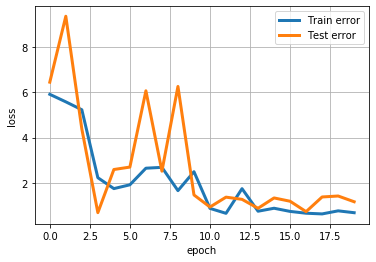

In [63]:
# Plot train and validation loss curves
plt.plot(np.arange(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(np.arange(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [64]:
def evaluate(dataloader):
    total, correct = 0, 0
    model.eval() # don't update weights
    for data in dataloader:
        images, labels = data
        predicted_output = model(images)
        _, predicted_labels = torch.max(predicted_output,1)
        total += labels.size(0)
        correct += (predicted_labels == labels).sum().item()
    return 100 * correct/total

print('Train acc = %0.2f, test acc = %0.2f' % (evaluate(trainDataLoader), evaluate(testDataLoader)))

Train acc = 61.67, test acc = 58.33
